# Kickstarter Projects

## Acknowledgements
Data are collected from Kickstarter Platform

usd conversion (usdpledgedreal and usdgoalreal columns) were generated from convert ks pledges to usd script done by tonyplaysguitar

Inspiration We hope to see great projects, and why not a model to predict if a project will be successful before it is released? :)

from https://www.kaggle.com/kemical/kickstarter-projects

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('ks-projects-201801.csv')

df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,378661.0,1.074731e+09,6.190862e+08,5971.00,5.382635e+08,1.075276e+09,1.610149e+09,2.147476e+09
goal,378661.0,4.908079e+04,1.183391e+06,0.01,2.000000e+03,5.200000e+03,1.600000e+04,1.000000e+08
pledged,378661.0,9.682979e+03,9.563601e+04,0.00,3.000000e+01,6.200000e+02,4.076000e+03,2.033899e+07
backers,378661.0,1.056175e+02,9.071850e+02,0.00,2.000000e+00,1.200000e+01,5.600000e+01,2.193820e+05
usd pledged,374864.0,7.036729e+03,7.863975e+04,0.00,1.698000e+01,3.947200e+02,3.034090e+03,2.033899e+07
usd_pledged_real,378661.0,9.058924e+03,9.097334e+04,0.00,3.100000e+01,6.243300e+02,4.050000e+03,2.033899e+07
usd_goal_real,378661.0,4.545440e+04,1.152950e+06,0.01,2.000000e+03,5.500000e+03,1.550000e+04,1.663614e+08


In [6]:
df.drop('ID',axis=1,inplace=True)

In [7]:
df.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [8]:
df.isnull().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

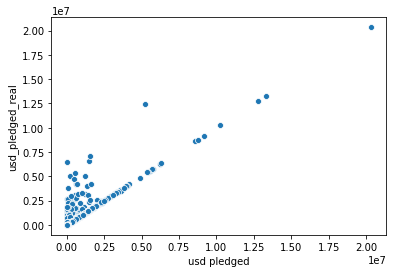

In [9]:
sns.scatterplot(x='usd pledged',y='usd_pledged_real',data=df)

In [10]:
# 'usd pledged' is dublicate values as 'usd_pledged_real'


df.drop('usd pledged',axis=1,inplace=True)

In [11]:
df['name'].fillna('Missing',inplace=True)

In [12]:
df.isnull().sum()

name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [13]:
df.head(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00


In [14]:
df['deadline']=pd.to_datetime(df['deadline'], format="%Y/%m/%d").dt.date
df['launched']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.date

In [15]:
df['days'] = (df['deadline'] - df['launched']).dt.days
df['launch_year']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.year

In [16]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,days,launch_year
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,1533.95,59,2015
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,2421.0,30000.00,60,2017
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,45000.00,45,2013
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,5000.00,30,2012
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283.0,19500.00,56,2015


In [17]:
df.drop(['launched','deadline'],axis=1,inplace=True)

In [18]:
df.head(3)

,name,category,main_category,currency,goal,pledged,state,backers,country,usd_pledged_real,usd_goal_real,days,launch_year
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,1533.95,59,2015
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,30000.0,2421.0,failed,15,US,2421.0,30000.00,60,2017
2,Where is Hank?,Narrative Film,Film & Video,USD,45000.0,220.0,failed,3,US,220.0,45000.00,45,2013


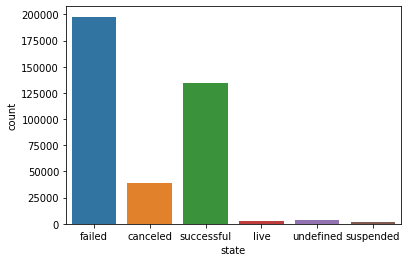

In [19]:
sns.countplot(df['state'])

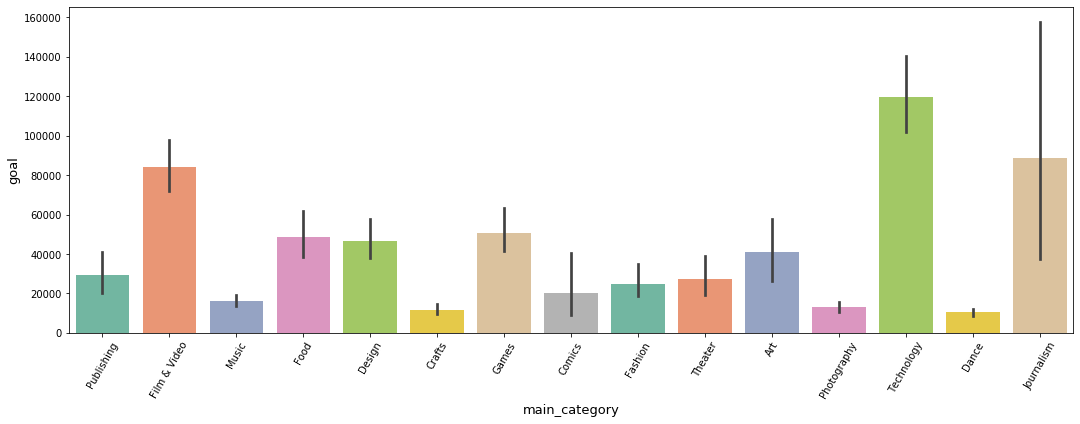

In [20]:
plt.figure(figsize=(18,6))

chart = sns.barplot(data=df,
                    x='main_category',
                    y='goal',
                    palette='Set2')

chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=60,
    horizontalalignment='center',
    fontweight='light'
)

plt.xlabel('main_category', size=13)
plt.ylabel('goal', size=13)
plt.show()

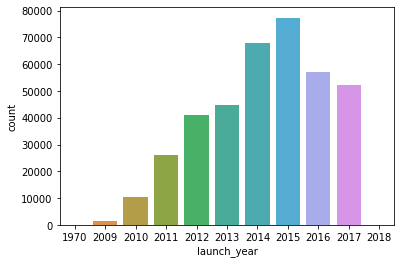

In [21]:
sns.countplot(df['launch_year'])

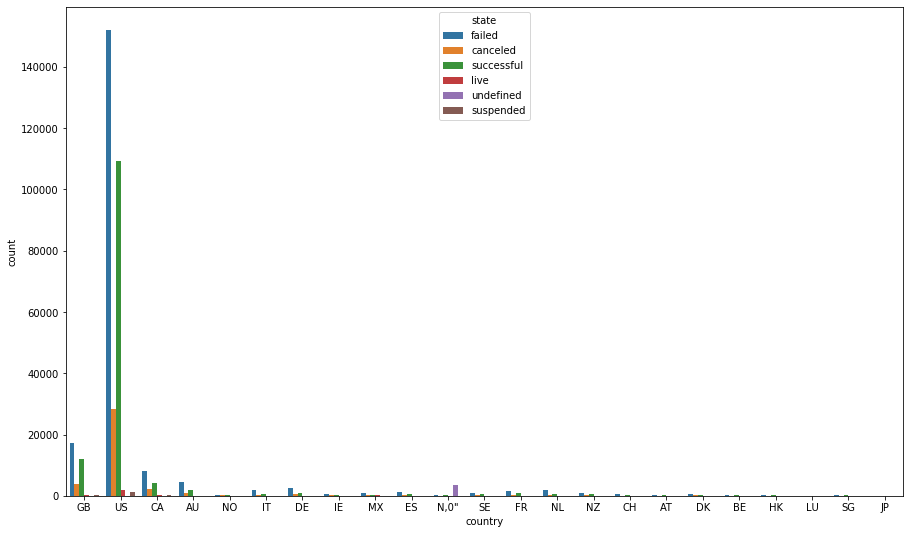

In [22]:
plt.figure(figsize=(15,9))
sns.countplot(df['country'],hue=df['state'])

#### Handling Categorical Data

In [23]:
categorical = [feat for feat in df.columns if df[feat].dtype == 'O']

categorical

['name', 'category', 'main_category', 'currency', 'state', 'country']

In [24]:
for feat in categorical:
    print(f'No. of Feature in {feat} is {len(df[feat].unique())}')

No. of Feature in name is 375765
No. of Feature in category is 159
No. of Feature in main_category is 15
No. of Feature in currency is 14
No. of Feature in state is 6
No. of Feature in country is 23


In [25]:
df.drop('name',axis=1,inplace=True)

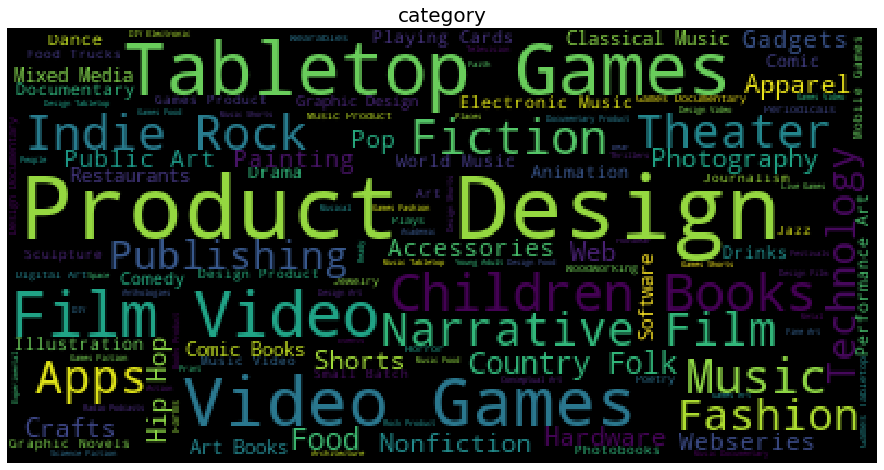

In [26]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(df['category'])
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='black', stopwords=stopwords).generate(text)
plt.figure(figsize=(20,8))
plt.title('category', fontsize=20)
plt.axis('off')
plt.imshow(wc)
plt.show()

##### taking Top 10 Occurance Data from each categorical feature

In [27]:

list_10 = list(df['category'].value_counts().sort_values(ascending=False).head(10).index)

list_10

['Product Design',
 'Documentary',
 'Music',
 'Tabletop Games',
 'Shorts',
 'Video Games',
 'Food',
 'Film & Video',
 'Fiction',
 'Fashion']

In [28]:
for cat in list_10:
    df[cat] = np.where(df['category']==cat,1,0)

In [29]:
df.head()

,category,main_category,currency,goal,pledged,state,backers,country,usd_pledged_real,usd_goal_real,days,launch_year,Product Design,Documentary,Music,Tabletop Games,Shorts,Video Games,Food,Film & Video,Fiction,Fashion
0,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,1533.95,59,2015,0,0,0,0,0,0,0,0,0,0
1,Narrative Film,Film & Video,USD,30000.0,2421.0,failed,15,US,2421.0,30000.00,60,2017,0,0,0,0,0,0,0,0,0,0
2,Narrative Film,Film & Video,USD,45000.0,220.0,failed,3,US,220.0,45000.00,45,2013,0,0,0,0,0,0,0,0,0,0
3,Music,Music,USD,5000.0,1.0,failed,1,US,1.0,5000.00,30,2012,0,0,1,0,0,0,0,0,0,0
4,Film & Video,Film & Video,USD,19500.0,1283.0,canceled,14,US,1283.0,19500.00,56,2015,0,0,0,0,0,0,0,1,0,0


In [30]:
df.drop('category',axis=1,inplace=True)

In [31]:
# 
list_10 = list(df['country'].value_counts().sort_values(ascending=False).head(10).index)

list_10

['US', 'GB', 'CA', 'AU', 'DE', 'N,0"', 'FR', 'IT', 'NL', 'ES']

In [32]:
for cat in list_10:
    df[cat] = np.where(df['country']==cat,1,0)
    
df.drop('country',axis=1,inplace=True)

df.head()

,main_category,currency,goal,pledged,state,backers,usd_pledged_real,usd_goal_real,days,launch_year,Product Design,Documentary,Music,Tabletop Games,Shorts,Video Games,Food,Film & Video,Fiction,Fashion,US,GB,CA,AU,DE,"N,0""",FR,IT,NL,ES
0,Publishing,GBP,1000.0,0.0,failed,0,0.0,1533.95,59,2015,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Film & Video,USD,30000.0,2421.0,failed,15,2421.0,30000.00,60,2017,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Film & Video,USD,45000.0,220.0,failed,3,220.0,45000.00,45,2013,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Music,USD,5000.0,1.0,failed,1,1.0,5000.00,30,2012,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Film & Video,USD,19500.0,1283.0,canceled,14,1283.0,19500.00,56,2015,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [33]:
categorical = [feat for feat in df.columns if df[feat].dtype == 'O']

categorical

['main_category', 'currency', 'state']

##### Label Encoding for output data 

In [34]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for feat in ['main_category', 'currency']:
    df[feat] = label.fit_transform(df[feat])

In [35]:
df.head()

,main_category,currency,goal,pledged,state,backers,usd_pledged_real,usd_goal_real,days,launch_year,Product Design,Documentary,Music,Tabletop Games,Shorts,Video Games,Food,Film & Video,Fiction,Fashion,US,GB,CA,AU,DE,"N,0""",FR,IT,NL,ES
0,12,5,1000.0,0.0,failed,0,0.0,1533.95,59,2015,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,6,13,30000.0,2421.0,failed,15,2421.0,30000.00,60,2017,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,6,13,45000.0,220.0,failed,3,220.0,45000.00,45,2013,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,10,13,5000.0,1.0,failed,1,1.0,5000.00,30,2012,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,6,13,19500.0,1283.0,canceled,14,1283.0,19500.00,56,2015,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [36]:
df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [37]:
df['state'] = df['state'].replace('canceled','other') 
df['state'] = df['state'].replace('undefined','other') 
df['state'] = df['state'].replace('suspended','other') 
df['state'] = df['state'].replace('live','other') 

In [38]:
df['state'].value_counts()

failed        197719
successful    133956
other          46986
Name: state, dtype: int64

In [39]:
data = df[(df['state']=='failed') | (df['state']=='successful')]

In [40]:
data['state'] = label.fit_transform(data['state'])

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
label.classes_

array(['failed', 'successful'], dtype=object)

In [42]:
data

,main_category,currency,goal,pledged,state,backers,usd_pledged_real,usd_goal_real,days,launch_year,Product Design,Documentary,Music,Tabletop Games,Shorts,Video Games,Food,Film & Video,Fiction,Fashion,US,GB,CA,AU,DE,"N,0""",FR,IT,NL,ES
0,12,5,1000.0,0.0,0,0,0.0,1533.95,59,2015,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,6,13,30000.0,2421.0,0,15,2421.0,30000.00,60,2017,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,6,13,45000.0,220.0,0,3,220.0,45000.00,45,2013,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,10,13,5000.0,1.0,0,1,1.0,5000.00,30,2012,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,7,13,50000.0,52375.0,1,224,52375.0,50000.00,35,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,7,13,6500.0,154.0,0,4,154.0,6500.00,30,2017,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
378657,6,13,1500.0,155.0,0,5,155.0,1500.00,27,2011,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
378658,6,13,15000.0,20.0,0,1,20.0,15000.00,46,2010,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
378659,13,13,15000.0,200.0,0,6,200.0,15000.00,31,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [43]:
X = data.drop('state',axis=1).values
y = data['state'].values

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Scaling Data

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Neural Network

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
model = Sequential()

model.add(Dense(25,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
early_stop = EarlyStopping(patience=4)

In [49]:
model.fit(X_train,y_train,epochs=40,batch_size=225,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 222222 samples, validate on 109453 samples
Epoch 1/40
222222/222222 [==============================] - 9s 40us/sample - loss: 0.6725 - accuracy: 0.5939 - val_loss: 0.6588 - val_accuracy: 0.6096
Epoch 2/40
222222/222222 [==============================] - 7s 31us/sample - loss: 0.6623 - accuracy: 0.6047 - val_loss: 0.6497 - val_accuracy: 0.6161
Epoch 3/40
222222/222222 [==============================] - 7s 31us/sample - loss: 0.6567 - accuracy: 0.6121 - val_loss: 0.6424 - val_accuracy: 0.6329
Epoch 4/40
222222/222222 [==============================] - 7s 32us/sample - loss: 0.6501 - accuracy: 0.6194 - val_loss: 0.6260 - val_accuracy: 0.6603
Epoch 5/40
222222/222222 [==============================] - 7s 32us/sample - loss: 0.6317 - accuracy: 0.6491 - val_loss: 0.5840 - val_accuracy: 0.7226
Epoch 6/40
222222/222222 [==============================] - 7s 32us/sample - loss: 0.5791 - accuracy: 0.7017 - val_loss: 0.4704 - val_accuracy: 0.7996
Epoch 7/40
222222/222222 [================

In [50]:
loss = pd.DataFrame(model.history.history)

In [51]:
loss.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

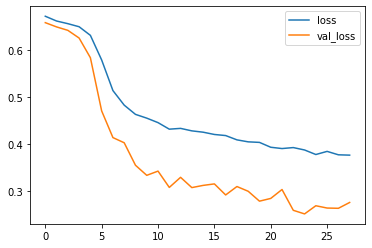

In [52]:
loss[['loss','val_loss']].plot()

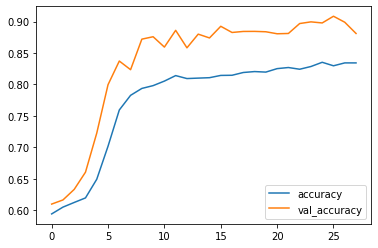

In [53]:
loss[['accuracy','val_accuracy']].plot()

In [54]:
predict = model.predict_classes(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


print(classification_report(y_test,predict))
print('\n')
print(confusion_matrix(y_test,predict))
print('\n')
print(accuracy_score(y_test,predict))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     65550
           1       0.89      0.80      0.84     43903

    accuracy                           0.88    109453
   macro avg       0.88      0.87      0.87    109453
weighted avg       0.88      0.88      0.88    109453



[[61363  4187]
 [ 8820 35083]]


0.8811636044694984


### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

rf_predict = rf.predict(X_test)

In [57]:

print(classification_report(y_test,rf_predict))
print('\n')
print(confusion_matrix(y_test,rf_predict))
print('\n')
print(accuracy_score(y_test,rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65550
           1       1.00      1.00      1.00     43903

    accuracy                           1.00    109453
   macro avg       1.00      1.00      1.00    109453
weighted avg       1.00      1.00      1.00    109453



[[65343   207]
 [   40 43863]]


0.9977433236183567


# Well Done Random Forest Perform Best !!! @